# 1.来自bit.ly的1.usa.gov数据

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# 读取文件
path = '/Users/pwh/Downloads/pydata-book-master/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:
# 使用json模块将JSON字符串装换成python字典对象
import json
records = [json.loads(line) for line in open(path)]
print records[0]
print records[0]['tz']

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', u'c': u'US', u'nk': 1, u'tz': u'America/New_York', u'gr': u'MA', u'g': u'A6qOVH', u'h': u'wfLQtf', u'cy': u'Danvers', u'l': u'orofrog', u'al': u'en-US,en;q=0.8', u'hh': u'1.usa.gov', u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991', u't': 1331923247, u'hc': 1331822918, u'll': [42.576698, -70.954903]}
America/New_York


In [8]:
# 用纯python代码对时区进行计数
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

# 计数函数
def get_count(seq):
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

# 计数函数2
from collections import defaultdict
def get_count2(seq):
    counts = defaultdict(int)   #所有的值均会被初始化为0
    for x in seq:
        counts[x] += 1
    return counts

In [10]:
# 对时区进行计数
counts = get_count(time_zones)

print counts['America/Caracas']
print len(time_zones)
print len(counts)

1
3440
97


In [9]:
# 得到前十位的时区及计数值
def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:n+1]

top_counts(counts)

NameError: name 'counts' is not defined

## 用pandas对时区进行计数

In [11]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np

In [12]:
# 传入字典生成DataFrame对象
frame = DataFrame(records)

In [13]:
# 利用Series的value_counts方法计数
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [14]:
# fillna函数替换缺失值
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

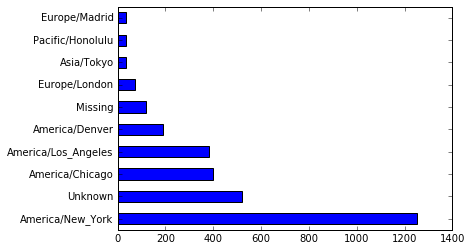

In [15]:
# 领counts对象的plot方法画水平条形图
tz_counts[:10].plot(kind='barh',rot=0)

In [17]:
# 统计浏览器
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [22]:
# 按是否windows用户对时区信息进行分解
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
operating_system[:6]

by_tz_os = cframe.groupby(['tz',operating_system])

In [24]:
# 通过size对分组进行计数,通过unstack对计数结果进行重塑
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [27]:
# 选取最常出现的时区
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [29]:
count_subset = agg_counts.take(indexer)[-10:] 
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


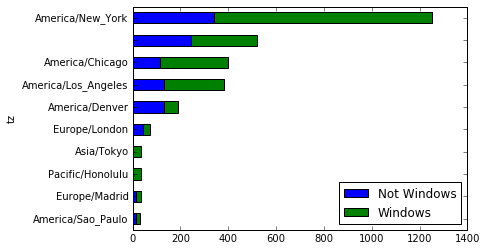

In [30]:
count_subset.plot(kind='barh',stacked=True)

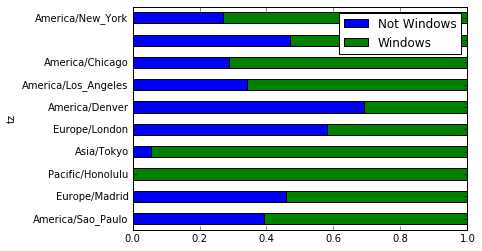

In [33]:
# 比例图
normaled_subset = count_subset.div(count_subset.sum(1),axis=0)
normaled_subset.plot(kind='barh',stacked=True)

# MoiveLens 1M 电影数据